<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Sep8-9/tarea9_septiembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 9 septiembre
Por Isaías Hernández Lares

Machine Learning Ago-Dic 2023




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Dataset Crab Age Prediction
Physical attributes of Crabs found in Boston area - to predict age of Crab

El conjunto de datos se utiliza para estimar la edad del cangrejo basándose en sus atributos físicos. https://www.kaggle.com/datasets/sidhus/crab-age-prediction?resource=download

In [2]:
crabs = pd.read_csv("/content/drive/MyDrive/Dataset/CrabAgePrediction.csv", delimiter=',')
t = crabs["Age"]
Xc = crabs.iloc[:,1:8]
labels = Xc.columns
Xc = Xc.to_numpy()
crabs

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [3]:
scaler = StandardScaler()
Xc_norm = scaler.fit_transform(Xc)

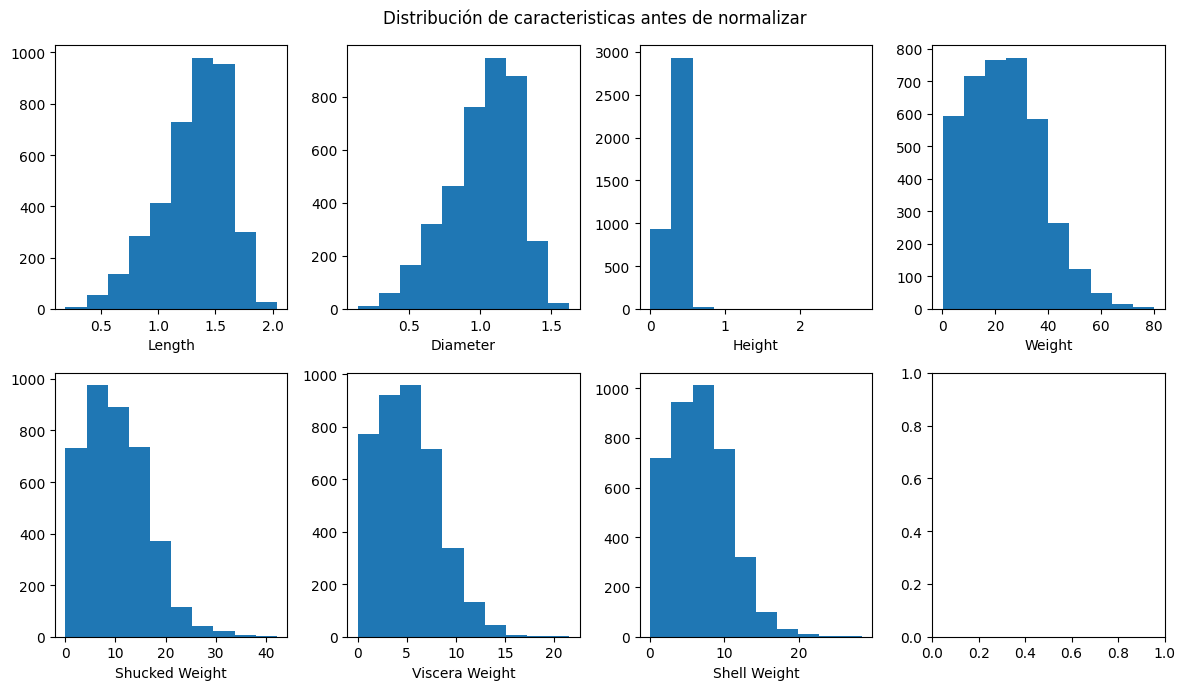

In [4]:
fig,ax=plt.subplots(2, 4, figsize=(12, 7))
j = 0
k = 0
for i in range(len(labels)):
  #print(i, j, k)
  ax[j, k].hist(Xc[:,i])
  ax[j, k].set_xlabel(labels[i])
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

fig.suptitle("Distribución de caracteristicas antes de normalizar")
plt.tight_layout()
plt.show()

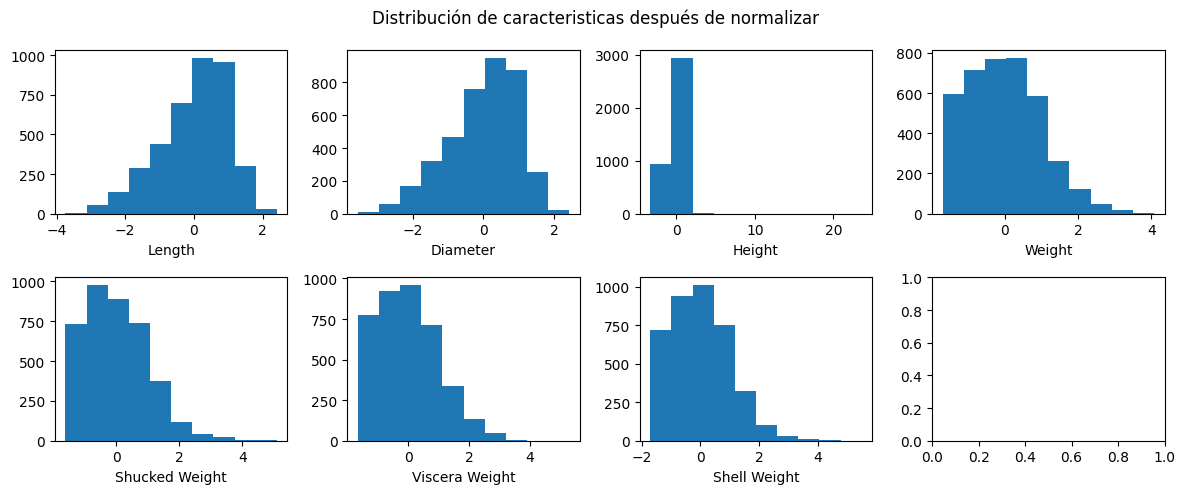

In [5]:
fig,ax=plt.subplots(2, 4, figsize=(12, 5))
j = 0
k = 0
for i in range(len(labels)):
  #print(i, j, k)
  ax[j, k].hist(Xc_norm[:,i])
  ax[j, k].set_xlabel(labels[i])
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

fig.suptitle("Distribución de caracteristicas después de normalizar")
plt.tight_layout()
plt.show()

In [6]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xc_norm, t)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 17, number of weight updates: 66182.0


In [7]:
type(sgdr)

sklearn.linear_model._stochastic_gradient.SGDRegressor

In [8]:
b0 = sgdr.intercept_ #w0_norm
w0 = sgdr.coef_      #w_norm
print(f"model parameters: \nw: {w0}, \nb:{b0}")

model parameters: 
w: [-0.43770983  1.34634546  0.85527167  4.25785797 -4.21692999 -1.32753481
  0.72241446], 
b:[9.82581808]


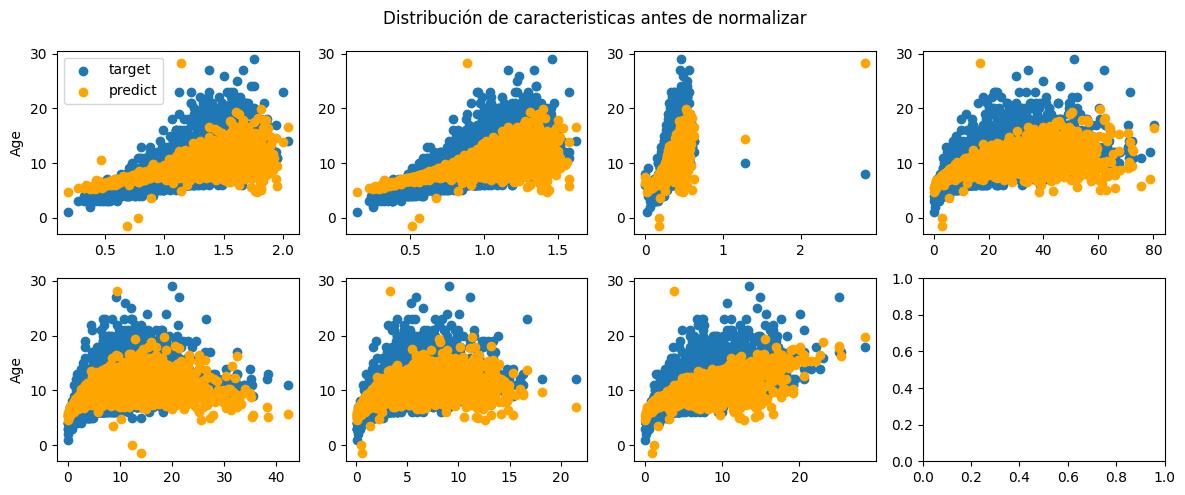

In [11]:
# Predecir el objetivo utilizando características normalizadas
yc = b0[0]
for i in range(len(w0)):
  yc += w0[i]*Xc_norm[:,i]

fig,ax=plt.subplots(2, 4, figsize=(12, 5))
j = 0
k = 0
for i in range(len(labels)):
  ax[j, k].scatter(Xc[:,i], t, label='target')
  ax[j, k].scatter(Xc[:,i], yc, color="orange", label = 'predict')
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

ax[0, 0].set_ylabel("Age"); ax[0, 0].legend();
ax[1, 0].set_ylabel("Age");
fig.suptitle("target versus prediction using normalized model")
plt.tight_layout()

plt.show()

In [12]:
#Dividir matrices o conjuntos de datos en subconjuntos de entrenamiento y prueba de forma aleatoria
X_train, X_test, y_train, y_test = train_test_split(Xc_norm, t, test_size=0.30, random_state=42)

In [13]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 12, number of weight updates: 32701.0


In [14]:
b1 = sgdr.intercept_ #w0_norm
w1 = sgdr.coef_     #w_norm
print(f"model parameters: \nb: {b1}, \nw:{w1}")

model parameters: 
b: [9.82802563], 
w:[-0.08981411  1.76747838 -0.37090279  3.17473499 -4.05112593 -0.51329803
  1.96500692]


In [15]:
score1 = sgdr.score(X_test,y_test)
score1

0.5040029147467163

In [16]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()


In [17]:
input_dim = 7
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
num_epochs = 100
batch_size = X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 380ms/step - loss: 112.0427
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 107.0253
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 102.4168
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 98.1506
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 94.1748
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 90.4488
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 86.9404
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 83.6242
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 80.4798
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 77.4904
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 74.6426
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 71.9251
Epoch 13/100
1/1 [===============

In [20]:
capas = model.layers[0]
w3, b3 = capas.get_weights()
print(w3,b3)

[[ 0.74621403]
 [-0.12242923]
 [ 0.5248431 ]
 [ 0.49135336]
 [-0.39660835]
 [ 0.4744914 ]
 [ 0.2297401 ]] [8.65046]


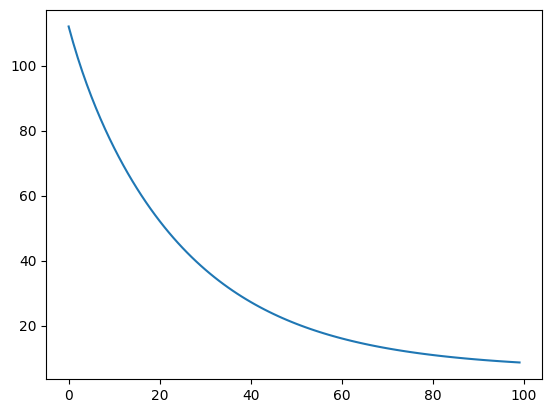

In [21]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [22]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 37ms/step - loss: 8.5417
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 8.4636
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3882
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3155
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 8.2453
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 8.1777
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 8.1125
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 8.0495
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 7.9888
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9302
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - loss: 7.8736
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 7.8190
Epoch 13/100
1/1 [==============================]

In [23]:
capas = model.layers[0]
w4, b4 = capas.get_weights()
print(w4,b4)

[[ 0.7709044 ]
 [ 0.03105571]
 [ 0.6162578 ]
 [ 0.45557278]
 [-0.958777  ]
 [ 0.25127548]
 [ 0.7628155 ]] [9.790966]


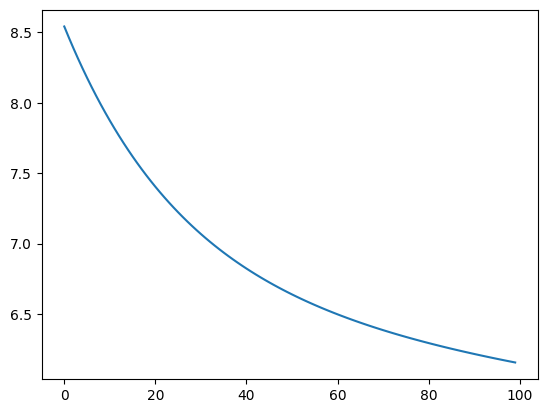

In [24]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [25]:
score2 = model.evaluate(X_test, y_test, verbose=0)
score2

5.740654945373535

In [26]:
print(f"Comparación de scores: \nscore 1: {score1} \nscore 2: {score2}")

Comparación de scores: 
score 1: 0.5040029147467163 
score 2: 5.740654945373535


In [28]:
print(f"Comparación de b's: \nb0: {b0} \nb1: {b1} \nb3: {b3} \nb4: {b4}")

Comparación de b's: 
b0: [9.82581808] 
b1: [9.82802563] 
b3: [8.65046] 
b4: [9.790966]


In [27]:
print(f"Comparación de w's: \nw0: {w0} \nw1: {w1} \nw3: {w3} \nw4: {w4}")

Comparación de w: 
w0: [-0.43770983  1.34634546  0.85527167  4.25785797 -4.21692999 -1.32753481
  0.72241446] 
w1: [-0.08981411  1.76747838 -0.37090279  3.17473499 -4.05112593 -0.51329803
  1.96500692] 
w3: [[ 0.74621403]
 [-0.12242923]
 [ 0.5248431 ]
 [ 0.49135336]
 [-0.39660835]
 [ 0.4744914 ]
 [ 0.2297401 ]] 
w4: [[ 0.7709044 ]
 [ 0.03105571]
 [ 0.6162578 ]
 [ 0.45557278]
 [-0.958777  ]
 [ 0.25127548]
 [ 0.7628155 ]]


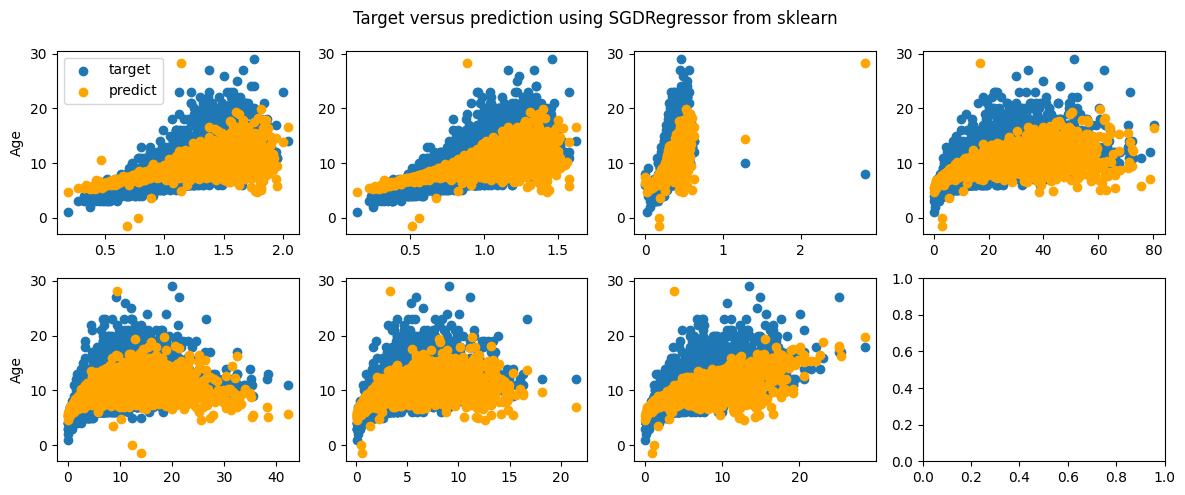

In [38]:
yc = b0[0]
for i in range(len(w0)):
  yc += w0[i]*Xc_norm[:,i]

fig,ax=plt.subplots(2, 4, figsize=(12, 5))
j = 0
k = 0
for i in range(len(labels)):
  ax[j, k].scatter(Xc[:,i], t, label='target')
  ax[j, k].scatter(Xc[:,i], yc, color="orange", label = 'predict')
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

ax[0, 0].set_ylabel("Age"); ax[0, 0].legend();
ax[1, 0].set_ylabel("Age");
fig.suptitle("Target versus prediction using SGDRegressor from sklearn")
plt.tight_layout()
plt.show()

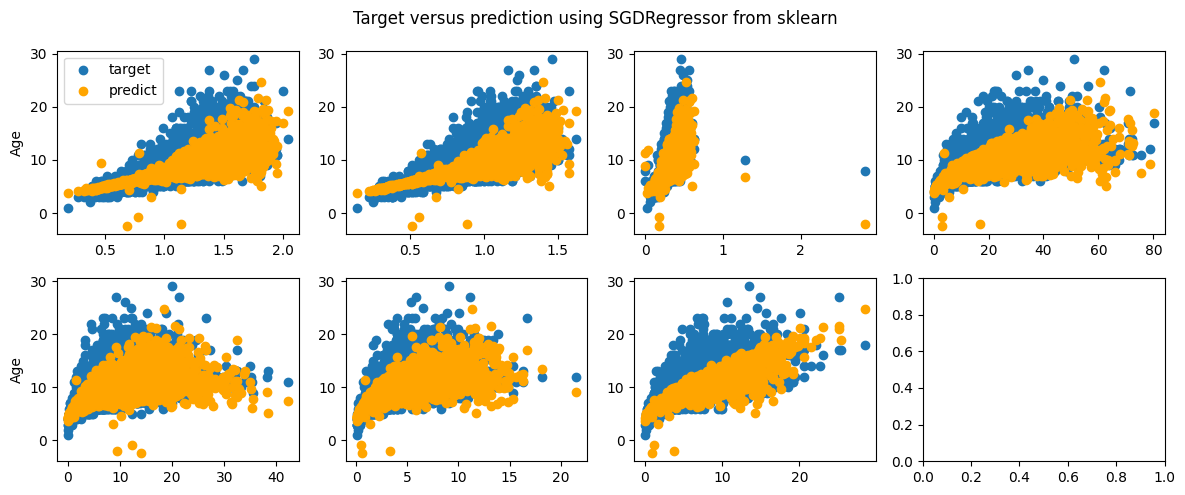

In [39]:
yc = b1[0]
for i in range(len(w1)):
  yc += w1[i]*Xc_norm[:,i]

fig,ax=plt.subplots(2, 4, figsize=(12, 5))
j = 0
k = 0
for i in range(len(labels)):
  ax[j, k].scatter(Xc[:,i], t, label='target')
  ax[j, k].scatter(Xc[:,i], yc, color="orange", label = 'predict')
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

ax[0, 0].set_ylabel("Age"); ax[0, 0].legend();
ax[1, 0].set_ylabel("Age");
fig.suptitle("Target versus prediction using SGDRegressor from sklearn")
plt.tight_layout()
plt.show()

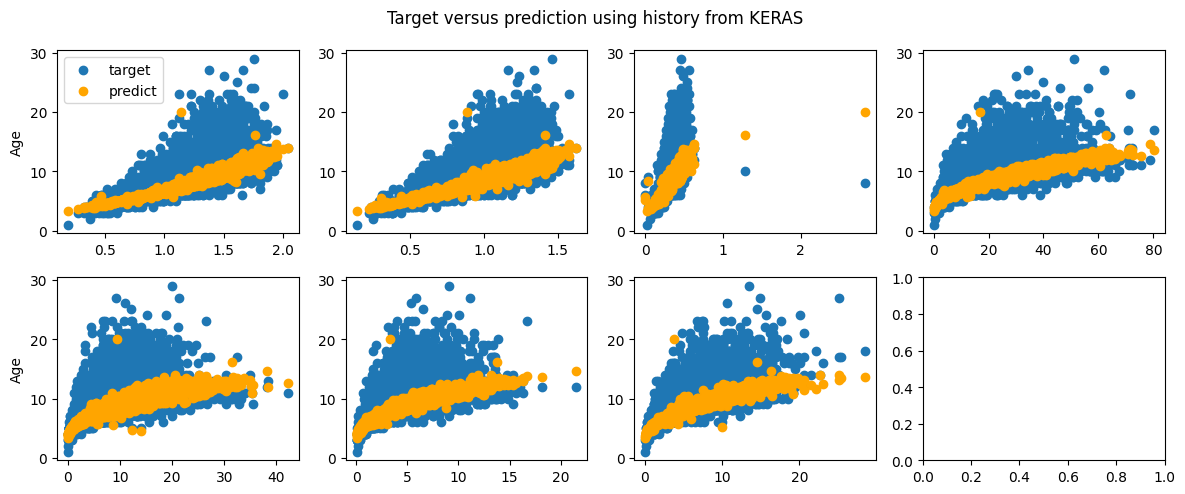

In [40]:
yc = b3[0]
for i in range(len(w3)):
  yc += w3[i]*Xc_norm[:,i]

fig,ax=plt.subplots(2, 4, figsize=(12, 5))
j = 0
k = 0
for i in range(len(labels)):
  ax[j, k].scatter(Xc[:,i], t, label='target')
  ax[j, k].scatter(Xc[:,i], yc, color="orange", label = 'predict')
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

ax[0, 0].set_ylabel("Age"); ax[0, 0].legend();
ax[1, 0].set_ylabel("Age");
fig.suptitle("Target versus prediction using history from KERAS")
plt.tight_layout()
plt.show()

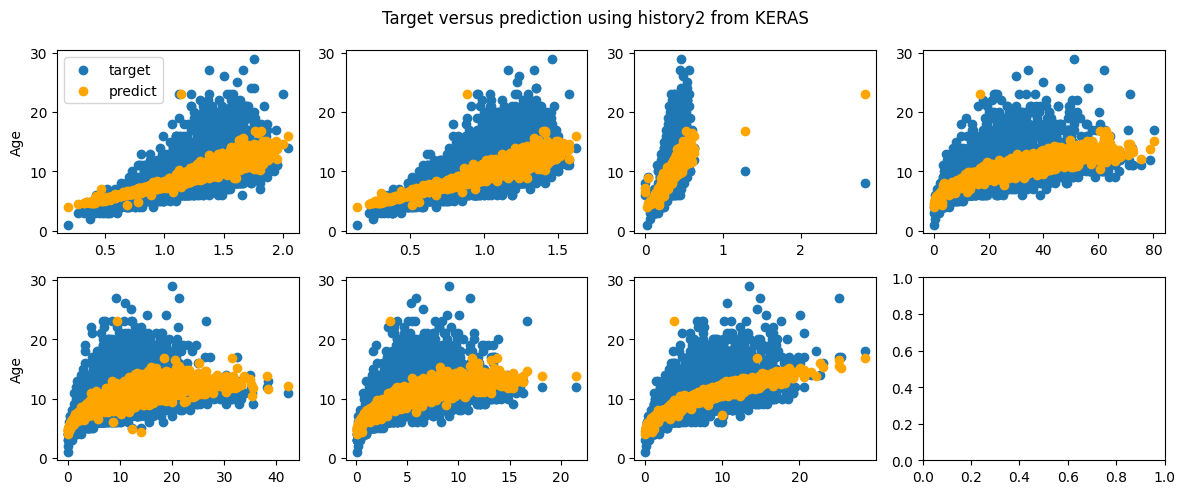

In [41]:
yc = b4[0]
for i in range(len(w4)):
  yc += w4[i]*Xc_norm[:,i]

fig,ax=plt.subplots(2, 4, figsize=(12, 5))
j = 0
k = 0
for i in range(len(labels)):
  ax[j, k].scatter(Xc[:,i], t, label='target')
  ax[j, k].scatter(Xc[:,i], yc, color="orange", label = 'predict')
  k += 1
  if k%4 == 0:
    k = 0
    j += 1

ax[0, 0].set_ylabel("Age"); ax[0, 0].legend();
ax[1, 0].set_ylabel("Age");
fig.suptitle("Target versus prediction using history2 from KERAS")
plt.tight_layout()
plt.show()

Las predicciones de los modelos de sklearn ajustan mejor la anchura de los datos que las predicciones de kera. Para este dataset de características de cangrejos es mejor utilizar sklearn para hacer predicciones sobre las edades de los cangrejos a partir de sus características físicas. Se ignoró el sexo de los cangrejos porque no sé cómo implementar estos métodos para variables string o binarias.